# Introduction
This is a weather forecasting project on regional hourly historical weather data of Kolkata<br>
The main focus of this project is to 
- explore and analyze the weather of Kolkata
- showcase the power of lstm and deep learning in the field of weather forecasting in comparison with other traditional ML models

## Dataset -
data is collected from visual crossing weather API from rapidAPI
datalink - https://www.visualcrossing.com/weather/weather-data-services/kolkata/metric/2017-01-01/2023-01-01#
the data is the hourly weather data of Kolkata from 2017 to 2022
It contains 25 columns, namely - 
* 'Address',
* 'Date time',
* 'Minimum Temperature',
* 'Maximum Temperature',
* 'Temperature',
* 'Dew Point',
* 'Relative Humidity',
* 'Heat Index',
* 'Wind Speed',
* 'Wind Gust',
* 'Wind Direction',
* 'Wind Chill',
* 'Precipitation',
* 'Precipitation Cover',
* 'Snow Depth',
* 'Visibility',
* 'Cloud Cover',
* 'Sea Level Pressure',
* 'Weather Type',
* 'Latitude',
* 'Longitude',
* 'Resolved Address',
* 'Name',
* 'Info',
* 'Conditions'

# Imports

In [1]:
!pip install windrose

In [ ]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import keras_tuner as kt
from sklearn.svm import SVR
from tensorflow import keras
from datetime import datetime
import matplotlib.pyplot as plt
from windrose import WindroseAxes
from itertools import combinations
from tensorflow.keras import layers
from kerastuner import RandomSearch
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from keras.layers import LSTM, Dense, Activation, Dropout
from kerastuner.engine.hyperparameters import HyperParameter
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
%matplotlib inline

In [3]:
path = "/kaggle/input/kolkata-weather-2017-2023-hourly/kolkata2017-2022.csv"
df = pd.read_csv(path)
df.head()

,Unnamed: 0,Address,Date time,Minimum Temperature,Maximum Temperature,Temperature,Dew Point,Relative Humidity,Heat Index,Wind Speed,...,Visibility,Cloud Cover,Sea Level Pressure,Weather Type,Latitude,Longitude,Resolved Address,Name,Info,Conditions
0,0,kolkata,01/01/2017 00:00:00,62.6,62.6,62.6,59.0,88.01,NaN,0.0,...,1.2,0.0,1015.0,Mist,22.5705,88.3712,"Kolkata, WB, India","Kolkata, WB, India",NaN,Clear
1,1,kolkata,01/01/2017 01:00:00,60.8,60.8,60.8,59.0,93.79,NaN,0.0,...,1.2,0.0,1015.0,Mist,22.5705,88.3712,"Kolkata, WB, India","Kolkata, WB, India",NaN,Clear
2,2,kolkata,01/01/2017 02:00:00,63.1,63.1,63.1,60.4,90.99,NaN,0.0,...,0.6,0.0,1015.4,"Mist, Fog",22.5705,88.3712,"Kolkata, WB, India","Kolkata, WB, India",NaN,Clear
3,3,kolkata,01/01/2017 03:00:00,60.8,60.8,60.8,59.0,93.79,NaN,5.8,...,0.6,0.0,1014.0,Mist,22.5705,88.3712,"Kolkata, WB, India","Kolkata, WB, India",NaN,Clear
4,4,kolkata,01/01/2017 04:00:00,59.0,59.0,59.0,57.2,93.75,NaN,0.0,...,1.2,0.0,1014.0,Mist,22.5705,88.3712,"Kolkata, WB, India","Kolkata, WB, India",NaN,Clear


# Analysis

In [4]:
df.describe()

,Unnamed: 0,Minimum Temperature,Maximum Temperature,Temperature,Dew Point,Relative Humidity,Heat Index,Wind Speed,Wind Gust,Wind Direction,Wind Chill,Precipitation,Precipitation Cover,Snow Depth,Visibility,Cloud Cover,Sea Level Pressure,Latitude,Longitude,Info
count,52700.00000,52582.000000,52582.000000,52582.000000,52582.000000,52582.000000,31914.000000,52569.000000,174.000000,52110.000000,23.000000,52700.000000,0.0,44213.0,52582.000000,51823.000000,52292.0000,5.270000e+04,5.270000e+04,0.0
mean,26349.50000,80.005087,80.005087,80.005087,71.071306,76.300376,98.187579,4.774183,28.481034,154.076991,47.956522,0.007346,NaN,0.0,2.030965,42.102445,1007.4535,2.257050e+01,8.837120e+01,NaN
std,15213.32393,9.576411,9.576411,9.576411,10.239441,16.274274,10.008346,4.088151,5.647869,116.298679,1.071459,0.082573,NaN,0.0,0.530839,32.111478,6.0261,3.552747e-15,1.421099e-14,NaN
min,0.00000,48.200000,48.200000,48.200000,33.800000,13.160000,79.300000,0.000000,20.800000,0.000000,45.600000,0.000000,NaN,0.0,0.000000,0.000000,977.4000,2.257050e+01,8.837120e+01,NaN
25%,13174.75000,74.800000,74.800000,74.800000,62.600000,66.580000,90.900000,1.400000,25.300000,30.000000,47.300000,0.000000,NaN,0.0,1.900000,0.000000,1002.9000,2.257050e+01,8.837120e+01,NaN
50%,26349.50000,82.400000,82.400000,82.400000,75.200000,80.560000,97.100000,4.700000,27.700000,160.000000,48.400000,0.000000,NaN,0.0,1.900000,50.000000,1007.9000,2.257050e+01,8.837120e+01,NaN
75%,39524.25000,86.000000,86.000000,86.000000,79.000000,88.920000,105.100000,6.900000,28.900000,229.000000,48.400000,0.000000,NaN,0.0,2.500000,69.700000,1012.3000,2.257050e+01,8.837120e+01,NaN
max,52699.00000,105.800000,105.800000,105.800000,89.600000,100.000000,142.100000,123.300000,55.300000,360.000000,49.400000,6.260000,NaN,0.0,8.600000,100.000000,1022.1000,2.257050e+01,8.837120e+01,NaN


In [5]:
df.isnull().sum()

Unnamed: 0                 0
Address                    0
Date time                  0
Minimum Temperature      118
Maximum Temperature      118
Temperature              118
Dew Point                118
Relative Humidity        118
Heat Index             20786
Wind Speed               131
Wind Gust              52526
Wind Direction           590
Wind Chill             52677
Precipitation              0
Precipitation Cover    52700
Snow Depth              8487
Visibility               118
Cloud Cover              877
Sea Level Pressure       408
Weather Type             659
Latitude                   0
Longitude                  0
Resolved Address           0
Name                       0
Info                   52700
Conditions               118
dtype: int64

### Primary Analogy -

- The dataset contains 52,700 rows and 20  numerical columns.
- The columns have different count values indicating the presence of missing data in some of the columns.
- The "Minimum Temperature", "Maximum Temperature", and "Temperature" columns have the same mean, indicating that they are probably measuring the same variable.
- The "Precipitation" column has very low mean value (0.007 mm) and a high maximum value (6.26 mm) suggesting the presence of some outliers.
- The "Wind Gust" column has only 174 non-null values, indicating that it has a significant amount of missing data.
- The "Snow Depth" column has only 0 non-null values, indicating that it does not have any data and can be dropped from the dataset.
- The "Unnamed: 0" column appears to be an index column and can also be dropped.
- The "Info" column has only missing values, and hence it can be dropped from the dataset.
- There are some columns with missing data which might require imputation to fill in the missing values.

In [6]:
len(df[df["Maximum Temperature"]!=df["Minimum Temperature"]])

118

**It basically proves the pressumption that** -  
> maximum temperature and minimum temperature **is measuring the same variable**, 
so these can be dropped as we already have a temperature column

## Preprocessing

In [7]:
redundant_cols = ["Unnamed: 0", "Minimum Temperature", "Maximum Temperature", "Snow Depth", "Heat Index", "Precipitation Cover", "Wind Gust", "Wind Chill", "Snow Depth", "Info", "Latitude", "Longitude", "Address", "Resolved Address", "Name"]
df.drop(redundant_cols, axis=1, inplace=True)

In [8]:
df = df.interpolate()
df.isnull().sum()

Date time               0
Temperature             0
Dew Point               0
Relative Humidity       0
Wind Speed              0
Wind Direction          0
Precipitation           0
Visibility              0
Cloud Cover             0
Sea Level Pressure      0
Weather Type          659
Conditions            118
dtype: int64

In [9]:
# filling the missing values of weather type and conditions with most frequent values
df['Conditions'].fillna(df['Conditions'].mode()[0], inplace=True)
df['Weather Type'].fillna(df['Weather Type'].mode()[0], inplace=True)

In [10]:
df.describe()

,Temperature,Dew Point,Relative Humidity,Wind Speed,Wind Direction,Precipitation,Visibility,Cloud Cover,Sea Level Pressure
count,52700.000000,52700.000000,52700.000000,52700.000000,52700.000000,52700.000000,52700.000000,52700.000000,52700.000000
mean,80.009368,71.082334,76.316576,4.773409,153.458264,0.007346,2.031267,41.589611,1007.454416
std,9.570973,10.235446,16.269980,4.090151,116.322184,0.082573,0.530848,32.261186,6.030347
min,48.200000,33.800000,13.160000,0.000000,0.000000,0.000000,0.000000,0.000000,977.400000
25%,74.800000,62.600000,66.580000,1.400000,30.000000,0.000000,1.900000,0.000000,1002.900000
50%,82.400000,75.200000,80.610000,4.700000,160.000000,0.000000,1.900000,50.000000,1008.000000
75%,86.000000,79.000000,88.920000,6.900000,228.000000,0.000000,2.500000,69.700000,1012.300000
max,105.800000,89.600000,100.000000,123.300000,360.000000,6.260000,8.600000,100.000000,1022.100000


In [11]:
df['DATETIME'] = pd.to_datetime(df['Date time'])
df.drop(["Date time"], axis=1, inplace=True)
df.rename(columns = {"Relative Humidity":"Humidity"}, inplace = True)
df.head()

,Temperature,Dew Point,Humidity,Wind Speed,Wind Direction,Precipitation,Visibility,Cloud Cover,Sea Level Pressure,Weather Type,Conditions,DATETIME
0,62.6,59.0,88.01,0.0,0.0,0.0,1.2,0.0,1015.0,Mist,Clear,2017-01-01 00:00:00
1,60.8,59.0,93.79,0.0,0.0,0.0,1.2,0.0,1015.0,Mist,Clear,2017-01-01 01:00:00
2,63.1,60.4,90.99,0.0,0.0,0.0,0.6,0.0,1015.4,"Mist, Fog",Clear,2017-01-01 02:00:00
3,60.8,59.0,93.79,5.8,20.0,0.0,0.6,0.0,1014.0,Mist,Clear,2017-01-01 03:00:00
4,59.0,57.2,93.75,0.0,0.0,0.0,1.2,0.0,1014.0,Mist,Clear,2017-01-01 04:00:00


#### Plotting scatter density graph for variable pairs with high corr matrix values

# Seasonal trends

In [12]:
def show_trends(y, figsize=(12,3), offset=6*30*24):
    trend_day = df[offset:offset+24].plot(x='DATETIME', y=y, figsize=figsize,label="Daily "+y)
    trend_month = df[offset:offset+24*30].plot(x='DATETIME', y=y, figsize=figsize,label="Monthly "+y)
    trend_year = df[:24*365].plot(x='DATETIME', y=y, figsize=figsize,label="Yearly "+y)
    trend_over_the_years = df.plot(x='DATETIME', y=y, figsize=figsize)

### Temperature

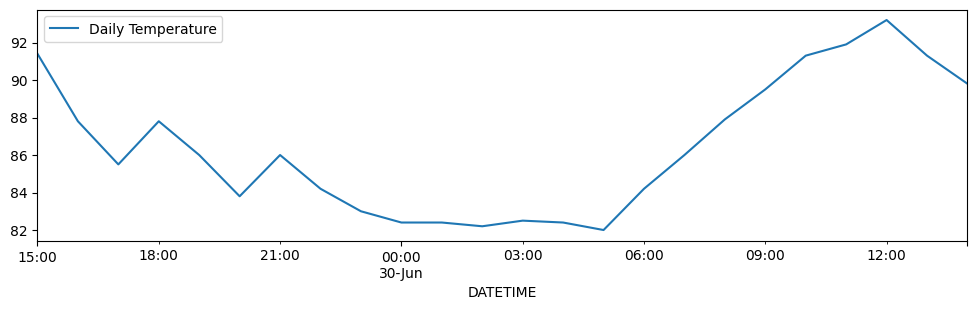

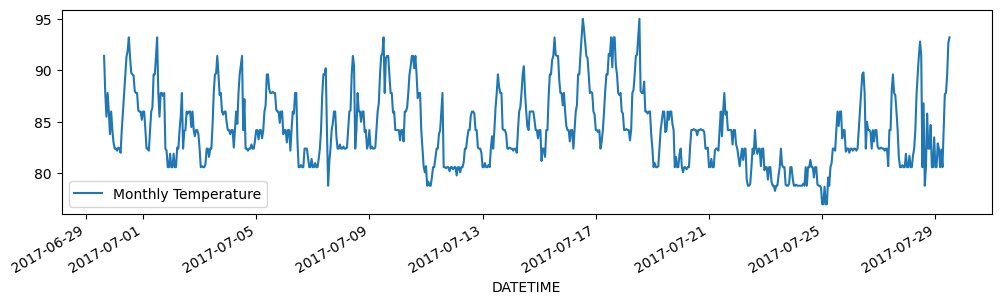

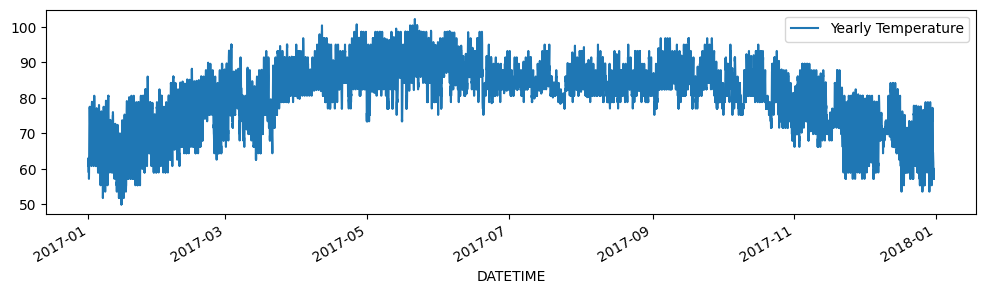

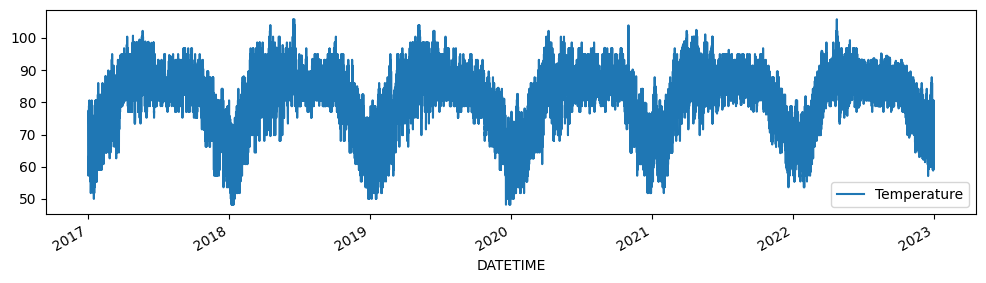

In [13]:
show_trends("Temperature")

### Humidity

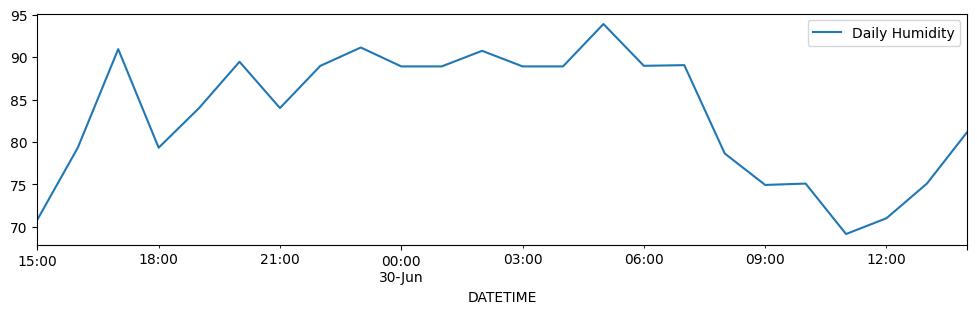

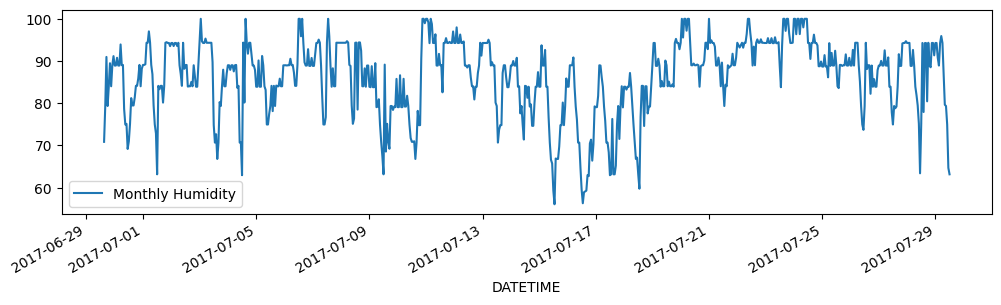

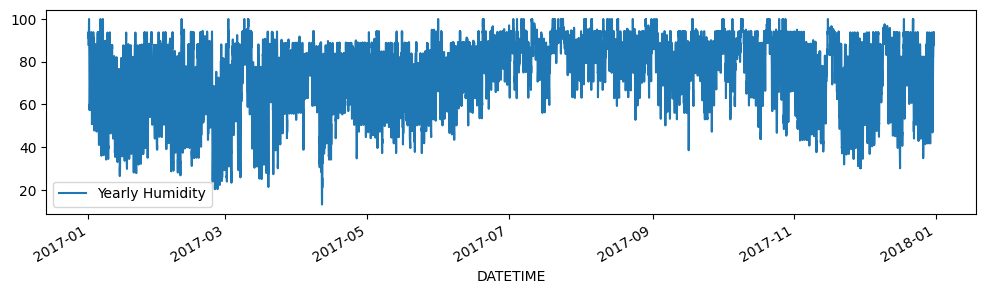

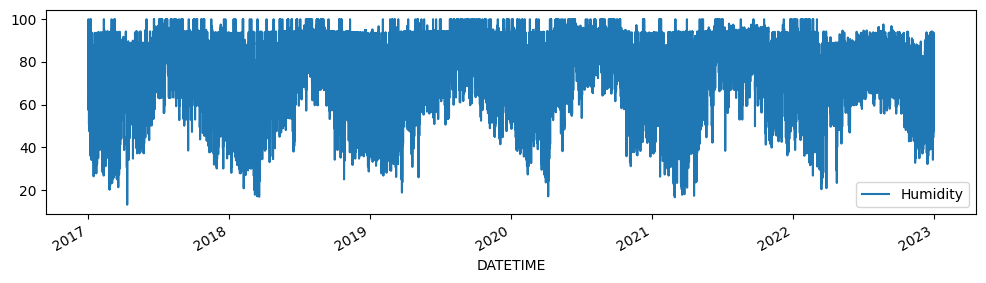

In [14]:
show_trends("Humidity")

### Precipitation

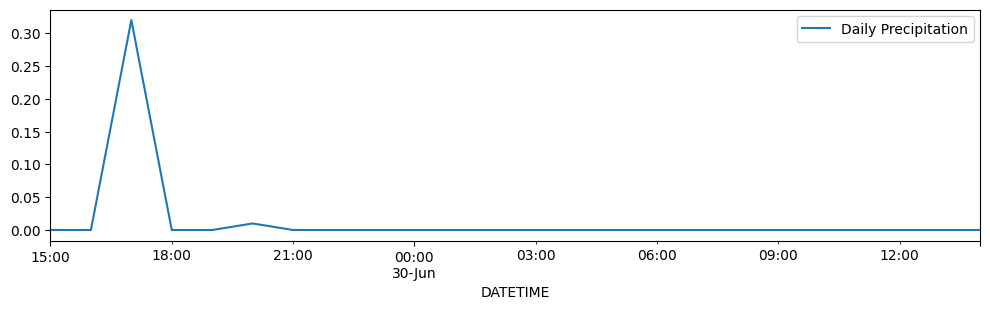

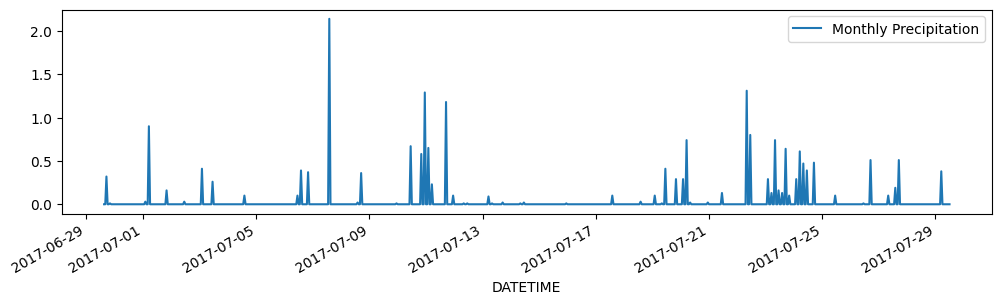

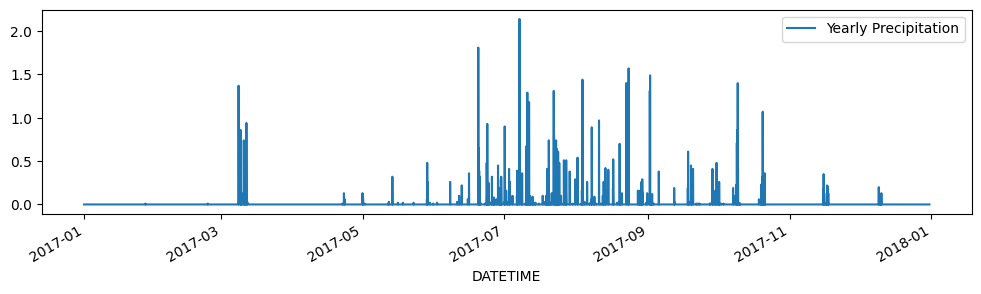

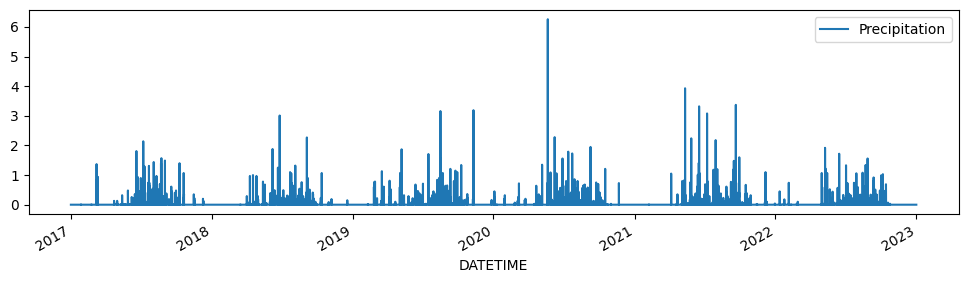

In [15]:
show_trends("Precipitation")

### Sea Level Pressure

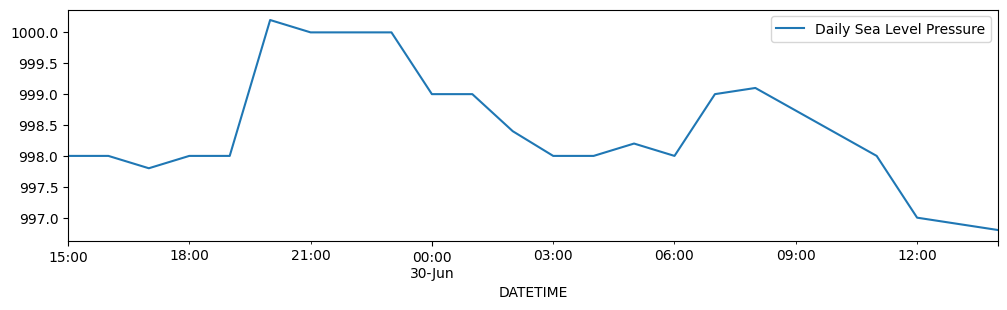

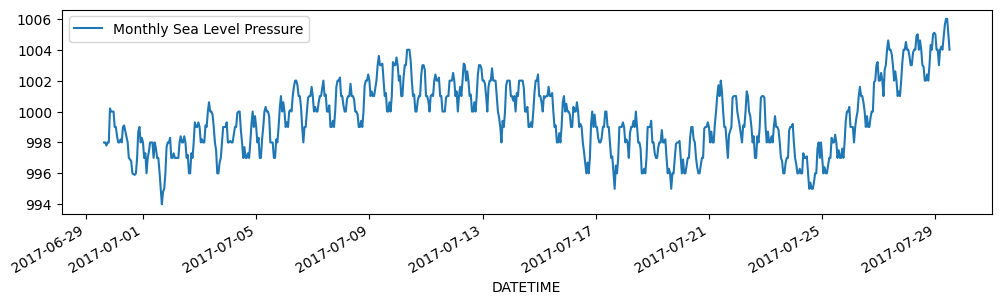

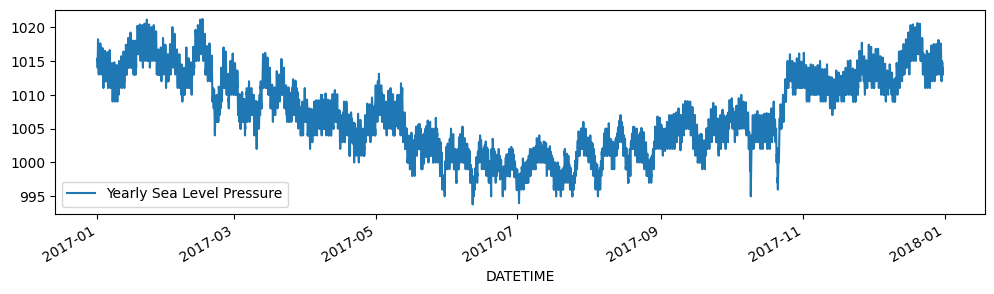

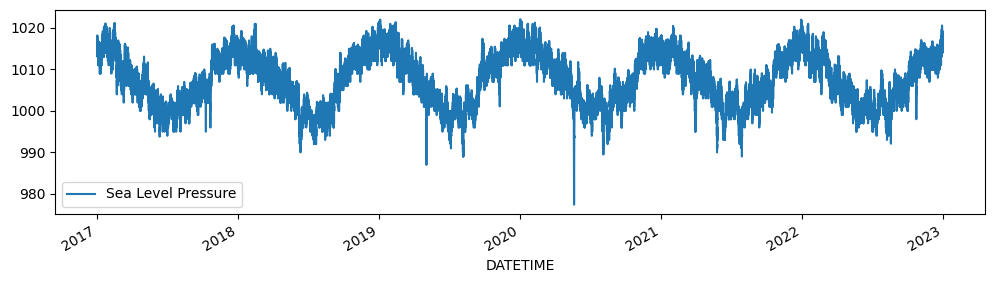

In [16]:
show_trends("Sea Level Pressure")

### Cloud Cover

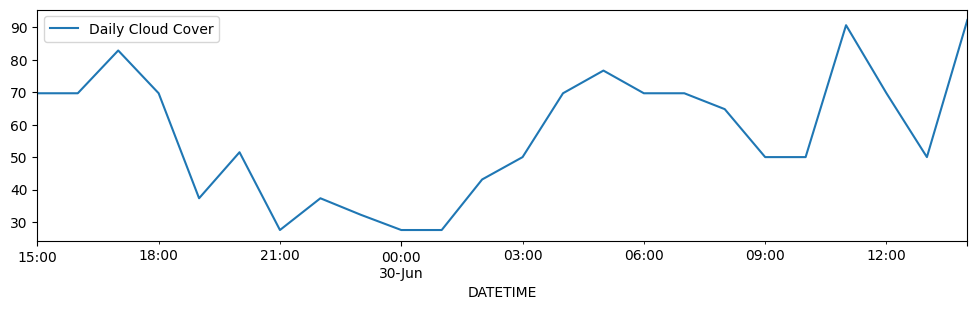

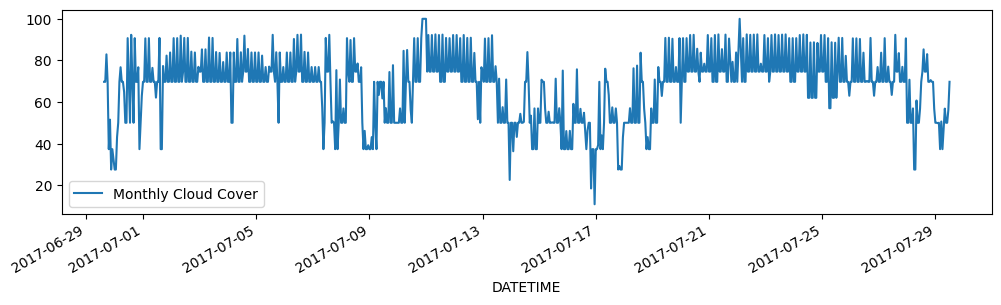

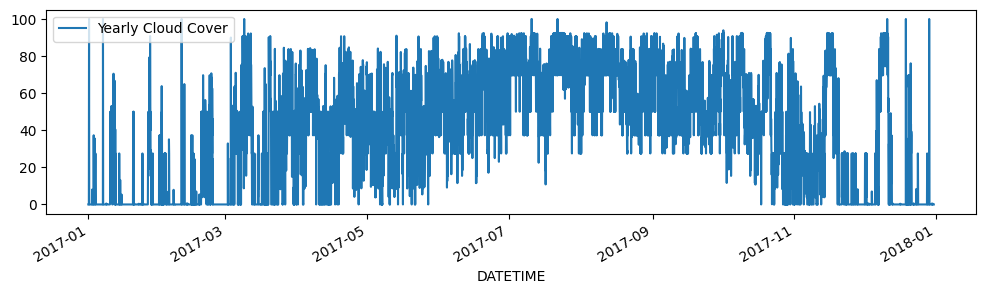

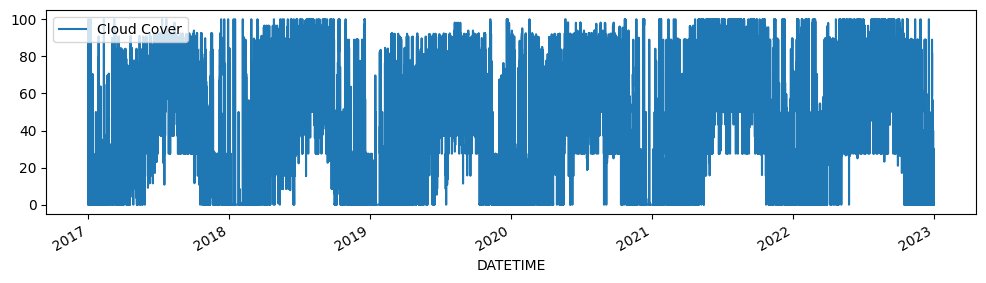

In [17]:
show_trends("Cloud Cover")

## Analogy
- these column certainly have some periodicity over the hours of day 
- also periodicity over the days of the year
- we can use this analogy to design the data such that it perfectly represents the periodic nature of day and year

### Box plot

In [18]:
def generate_boxplot(df, columns):
    fig, ax = plt.subplots()
    ax.boxplot(df[columns].values, labels=columns)
    ax.set_title('Box plot of {}'.format(', '.join(columns)))
    ax.set_ylabel('Value')
    plt.show()

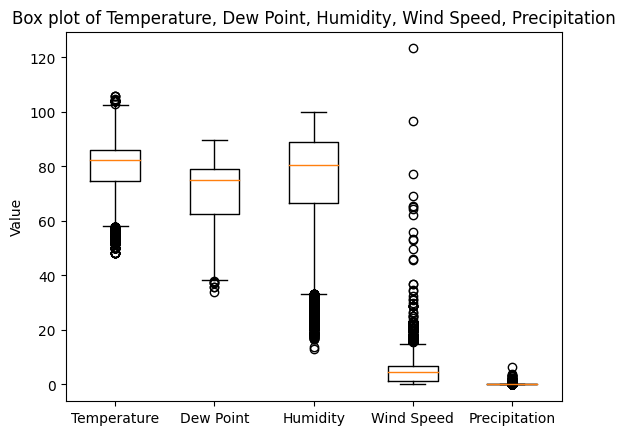

In [19]:
generate_boxplot(df, ['Temperature', 'Dew Point', 'Humidity', 'Wind Speed', 'Precipitation'])

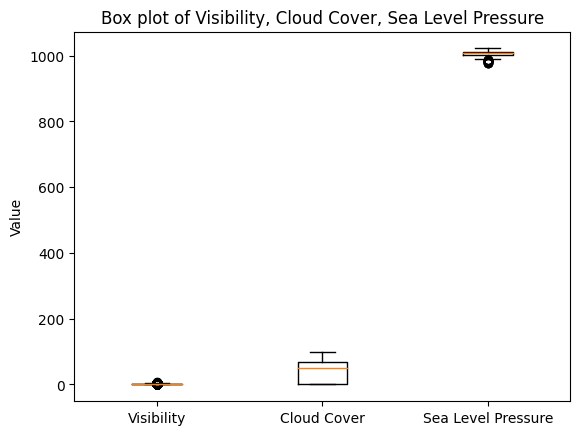

In [20]:
generate_boxplot(df, ["Visibility", "Cloud Cover", "Sea Level Pressure"])

**Analogy**
- Temperature: The median temperature is around 82.4 degrees Fahrenheit, with a range of 48.2 to 105.8 degrees Fahrenheit. There are some outliers on the lower and higher end of the temperature range.
- Dew Point: The median dew point is around 75.2 degrees Fahrenheit, with a range of 33.8 to 89.6 degrees Fahrenheit. There are some outliers on the lower and higher end of the dew point range.
- Relative Humidity: The median relative humidity is around 80.6%, with a range of 13.2% to 100%. There are some outliers on the lower end of the relative humidity range.
- Wind Speed: The median wind speed is around 4.7 mph, with a range of 0 to 123.3 mph. There are some outliers on the higher end of the wind speed range.
- Wind Direction: The median wind direction is around 160 degrees, with a range of 0 to 360 degrees. The distribution is somewhat uniform across the range.
- Precipitation: The median precipitation is very low, at only 0.0 inches, with a range of 0.0 to 6.26 inches. There are many outliers on the higher end of the precipitation range.
- Visibility: The median visibility is 1.9 miles, with a range of 0.0 to 8.6 miles. There are some outliers on the lower end of the visibility range.
- Cloud Cover: The median cloud cover is around 50%, with a range of 0 to 100%. The distribution is somewhat uniform across the range.
- Sea Level Pressure: The median sea level pressure is around 1008.0 mb, with a range of 977.4 to 1022.1 mb. There are some outliers on the lower end of the sea level pressure range.
- wind speed, precipitation etc has very low weightage in comparison with high valued columns like temperature, humidity and sea level pressure. So, the data columns need to be scaled down.

#### Circular Plot

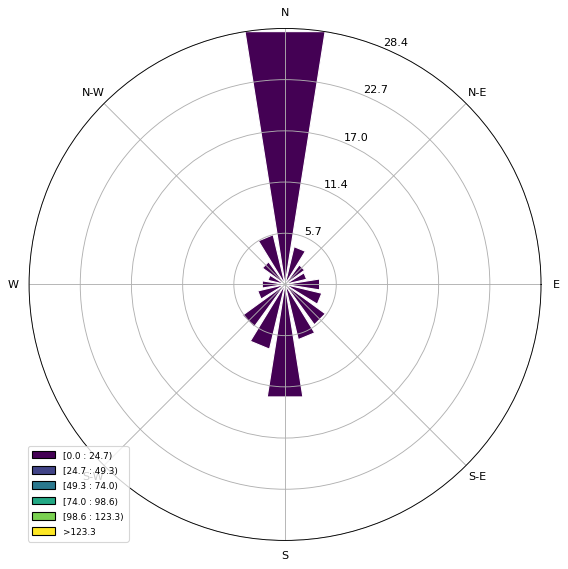

In [21]:
# Create a windrose plot
ax = WindroseAxes.from_ax()
ax.bar(df['Wind Direction'], df['Wind Speed'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()

# Show the plot
plt.show()

**Analogy** 
- wind speed is low as we can see from df.describe() that 75% of data is below 7 KMPH
- wind direction is mostly towards north

## Data Manipulation

#### Changing the string data into usable ordinal values

In [22]:
set(df["Conditions"])

{'Clear',
 'Overcast',
 'Partially cloudy',
 'Rain',
 'Rain, Overcast',
 'Rain, Partially cloudy'}

In [23]:
set([w.strip() for weather in df["Weather Type"] for w in weather.split(',')])

{'Drizzle',
 'Dust storm',
 'Fog',
 'Heavy Rain',
 'Light Drizzle',
 'Light Rain',
 'Light Snow',
 'Lightning Without Thunder',
 'Mist',
 'Precipitation In Vicinity',
 'Rain',
 'Rain Showers',
 'Sky Coverage Decreasing',
 'Sky Coverage Increasing',
 'Sky Unchanged',
 'Smoke Or Haze',
 'Snow And Rain Showers',
 'Thunderstorm',
 'Thunderstorm Without Precipitation'}

In [24]:
# create a dictionary of numerical values
rain_values = {'Heavy Rain': 7, 'Snow And Rain Showers': 6,
                  'Rain Showers': 5, 'Rain': 4, 'Light Rain': 3, 'Light Drizzle': 2, 'Drizzle': 1}

storm_values = {
    'Dust storm':1,
    'Lightning Without Thunder':2,
    'Thunderstorm Without Precipitation':3,
    'Thunderstorm': 4,
}

overview = {
    'Clear':1,
    'Partially cloudy':2,
    'Rain':2,
    'Overcast':3,
}

# function to map weather values to numerical values
def map_weather_to_numerical(weather, ordinal_values):
    val = 0
    for w in weather.split(","):
        w = w.strip()
        if w in ordinal_values:
            val = max(ordinal_values[w], val)
    
    return val

# create a new column with numerical values
df["Rain"] = df['Weather Type'].apply(lambda s: map_weather_to_numerical(s, rain_values))
df["Storm"] = df['Weather Type'].apply(lambda s: map_weather_to_numerical(s, storm_values))
df["Overview"] = df['Conditions'].apply(lambda s: map_weather_to_numerical(s, overview))

df.head()

,Temperature,Dew Point,Humidity,Wind Speed,Wind Direction,Precipitation,Visibility,Cloud Cover,Sea Level Pressure,Weather Type,Conditions,DATETIME,Rain,Storm,Overview
0,62.6,59.0,88.01,0.0,0.0,0.0,1.2,0.0,1015.0,Mist,Clear,2017-01-01 00:00:00,0,0,1
1,60.8,59.0,93.79,0.0,0.0,0.0,1.2,0.0,1015.0,Mist,Clear,2017-01-01 01:00:00,0,0,1
2,63.1,60.4,90.99,0.0,0.0,0.0,0.6,0.0,1015.4,"Mist, Fog",Clear,2017-01-01 02:00:00,0,0,1
3,60.8,59.0,93.79,5.8,20.0,0.0,0.6,0.0,1014.0,Mist,Clear,2017-01-01 03:00:00,0,0,1
4,59.0,57.2,93.75,0.0,0.0,0.0,1.2,0.0,1014.0,Mist,Clear,2017-01-01 04:00:00,0,0,1


In [25]:
df[["Rain", "Storm", "Overview"]].describe()

,Rain,Storm,Overview
count,52700.000000,52700.000000,52700.000000
mean,0.242581,0.147230,1.877571
std,0.866558,0.734707,0.685061
min,0.000000,0.000000,1.000000
25%,0.000000,0.000000,1.000000
50%,0.000000,0.000000,2.000000
75%,0.000000,0.000000,2.000000
max,7.000000,4.000000,3.000000


conclusion - the std of rain and storm is near to 1 which means the rain and storm column might have some outliers

In [26]:
df.drop(["Weather Type", "Conditions"], axis=1, inplace=True)

### DATETIME => Seconds

In [27]:
df["seconds"] = df["DATETIME"].map(pd.Timestamp.timestamp)
df.drop("DATETIME", axis=1, inplace=True)
df.head()

,Temperature,Dew Point,Humidity,Wind Speed,Wind Direction,Precipitation,Visibility,Cloud Cover,Sea Level Pressure,Rain,Storm,Overview,seconds
0,62.6,59.0,88.01,0.0,0.0,0.0,1.2,0.0,1015.0,0,0,1,1.483229e+09
1,60.8,59.0,93.79,0.0,0.0,0.0,1.2,0.0,1015.0,0,0,1,1.483232e+09
2,63.1,60.4,90.99,0.0,0.0,0.0,0.6,0.0,1015.4,0,0,1,1.483236e+09
3,60.8,59.0,93.79,5.8,20.0,0.0,0.6,0.0,1014.0,0,0,1,1.483240e+09
4,59.0,57.2,93.75,0.0,0.0,0.0,1.2,0.0,1014.0,0,0,1,1.483243e+09


### Processing the seconds to represent the periodic nature of days and years

In [28]:
day_in_seconds = 24*3600
year_in_seconds = day_in_seconds * 365.2425
df["sin(day)"] = np.sin((df["seconds"]*(2*np.pi))/day_in_seconds) #-----------> radian_per_day = (2*np.pi)/(day_in_seconds)
df["cos(day)"] = np.cos((df["seconds"]*(2*np.pi))/day_in_seconds)
df["sin(year)"] = np.sin((df["seconds"]*(2*np.pi))/year_in_seconds) #---------> radian_per_year = (2*np.pi)/(365.2425*24)
df["cos(year)"] = np.cos((df["seconds"]*(2*np.pi))/year_in_seconds)
df.drop("seconds", axis=1, inplace=True)
df.head()

,Temperature,Dew Point,Humidity,Wind Speed,Wind Direction,Precipitation,Visibility,Cloud Cover,Sea Level Pressure,Rain,Storm,Overview,sin(day),cos(day),sin(year),cos(year)
0,62.6,59.0,88.01,0.0,0.0,0.0,1.2,0.0,1015.0,0,0,1,2.504006e-13,1.000000,0.010364,0.999946
1,60.8,59.0,93.79,0.0,0.0,0.0,1.2,0.0,1015.0,0,0,1,2.588190e-01,0.965926,0.011081,0.999939
2,63.1,60.4,90.99,0.0,0.0,0.0,0.6,0.0,1015.4,0,0,1,5.000000e-01,0.866025,0.011798,0.999930
3,60.8,59.0,93.79,5.8,20.0,0.0,0.6,0.0,1014.0,0,0,1,7.071068e-01,0.707107,0.012515,0.999922
4,59.0,57.2,93.75,0.0,0.0,0.0,1.2,0.0,1014.0,0,0,1,8.660254e-01,0.500000,0.013231,0.999912


## Correlation Analysis

In [29]:
corr_matrix = df.corr()
print(corr_matrix)

                    Temperature  Dew Point  Humidity  Wind Speed  \

Temperature            1.000000   0.713441 -0.264862    0.411091   

Dew Point              0.713441   1.000000  0.477108    0.290749   

Humidity              -0.264862   0.477108  1.000000   -0.119483   

Wind Speed             0.411091   0.290749 -0.119483    1.000000   

Wind Direction         0.182459   0.008141 -0.217870    0.338639   

Precipitation         -0.004070   0.051814  0.087005   -0.006767   

Visibility             0.645804   0.343903 -0.344509    0.283885   

Cloud Cover            0.382941   0.642705  0.416452    0.211872   

Sea Level Pressure    -0.639692  -0.773630 -0.283836   -0.320852   

Rain                   0.019371   0.163159  0.221257    0.040533   

Storm                  0.032599   0.119827  0.135481    0.070269   

Overview               0.383445   0.615131  0.374449    0.194208   

sin(day)              -0.218663   0.013780  0.308510   -0.086259   

cos(day)              -0.396926   

<AxesSubplot: >

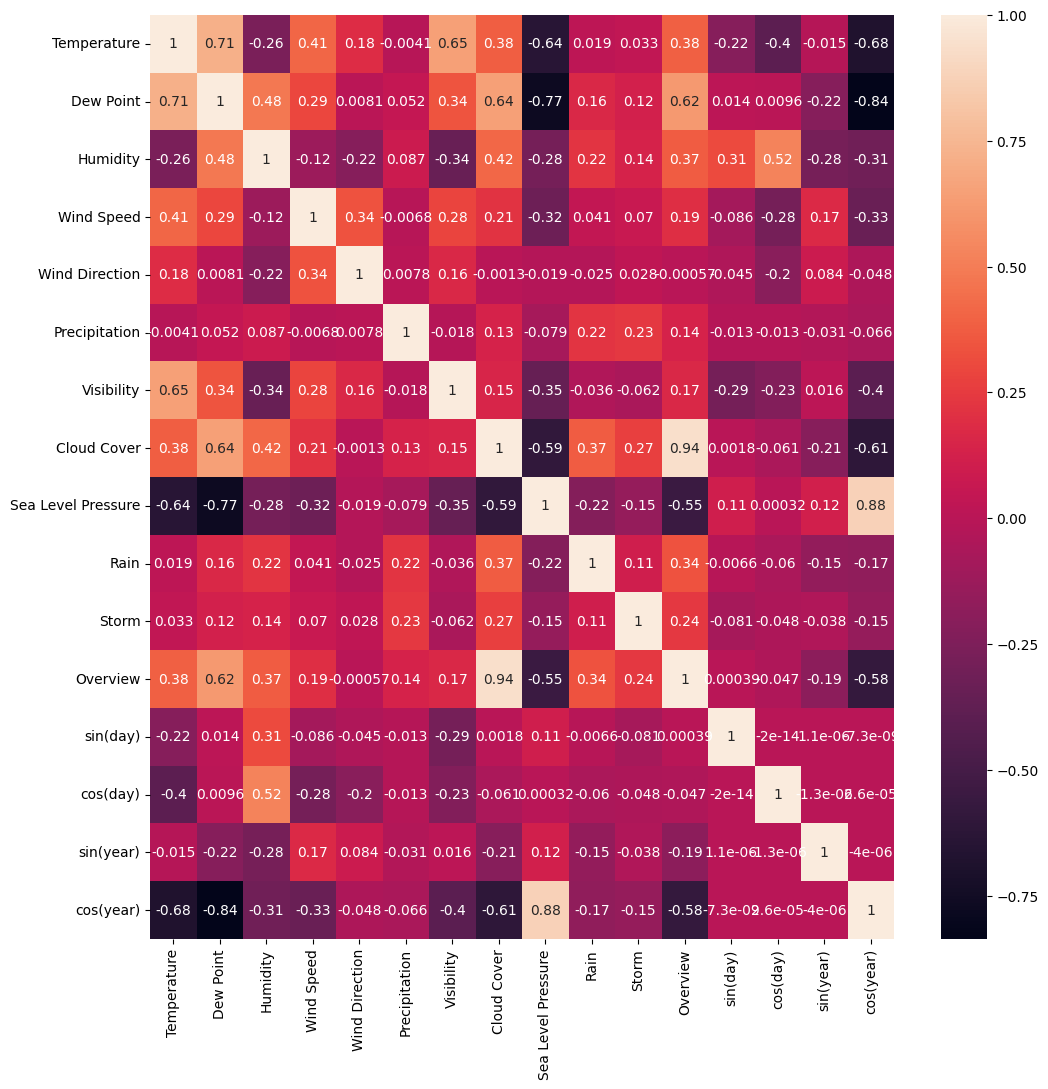

In [30]:
fig, ax = plt.subplots(figsize=(12,12)) 
sns.heatmap(df.corr(), annot=True)

### Analogy
This is the correlation matrix of the numerical columns in your DataFrame. The values range from -1 to 1, where -1 indicates a strong negative correlation, 0 indicates no correlation, and 1 indicates a strong positive correlation. Here are some insights you can gather from this matrix:

- Temperature is strongly positively correlated with Dew Point and Visibility, meaning that as temperature increases, dew point and visibility also tend to increase.
- Temperature is strongly negatively correlated with Relative Humidity and Sea Level Pressure, meaning that as temperature increases, relative humidity and sea level pressure tend to decrease.
- Dew Point is strongly negatively correlated with Sea Level Pressure, meaning that as dew point increases, sea level pressure tends to decrease.
- Visibility is moderately negatively correlated with Relative Humidity and Cloud Cover, meaning that as visibility decreases, relative humidity and cloud cover tend to increase.
- Cloud Cover is moderately positively correlated with Dew Point and Visibility, meaning that as cloud cover increases, dew point and visibility tend to increase.

In [31]:
def plot_scatter_density(df, output, corr_thresh=0.6, size=3):
    # Create a correlation matrix
    corr_matrix = df.corr()

    # Get the names of highly correlated variables
    high_corr_vars = set()
    high_corr_vars.add(output)
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >= corr_thresh:
                colname = corr_matrix.columns[i]
                high_corr_vars.add(colname)
                
    print((high_corr_vars))
    sns.pairplot(data=df[list(high_corr_vars)], kind='scatter', hue=output)
    

### Temperature variability

{'Overview', 'Visibility', 'Sea Level Pressure', 'Dew Point', 'Temperature', 'cos(year)', 'Cloud Cover'}


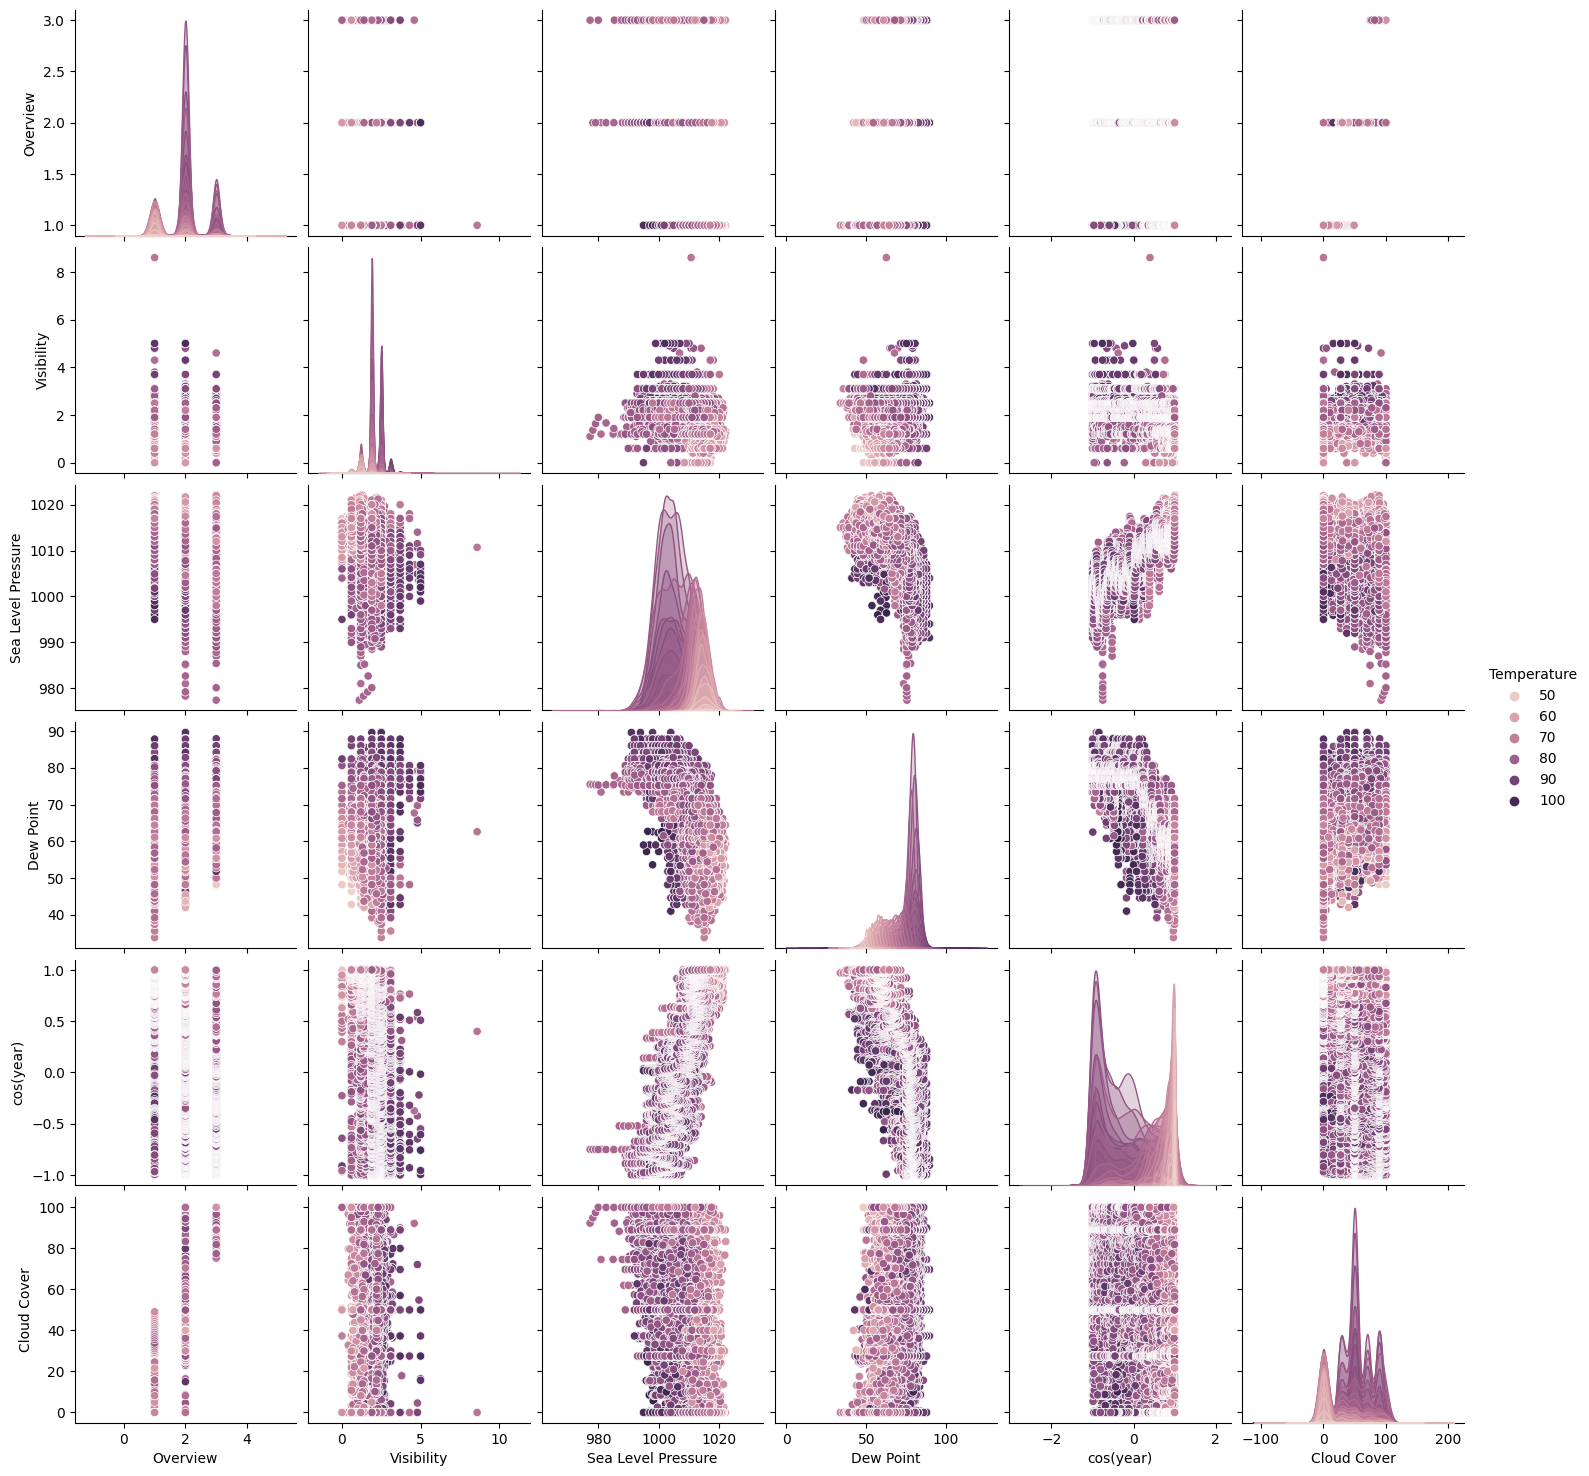

In [32]:
plot_scatter_density(df, "Temperature")

### Humidity variability

{'Overview', 'Visibility', 'Sea Level Pressure', 'Dew Point', 'cos(year)', 'Humidity', 'Cloud Cover'}


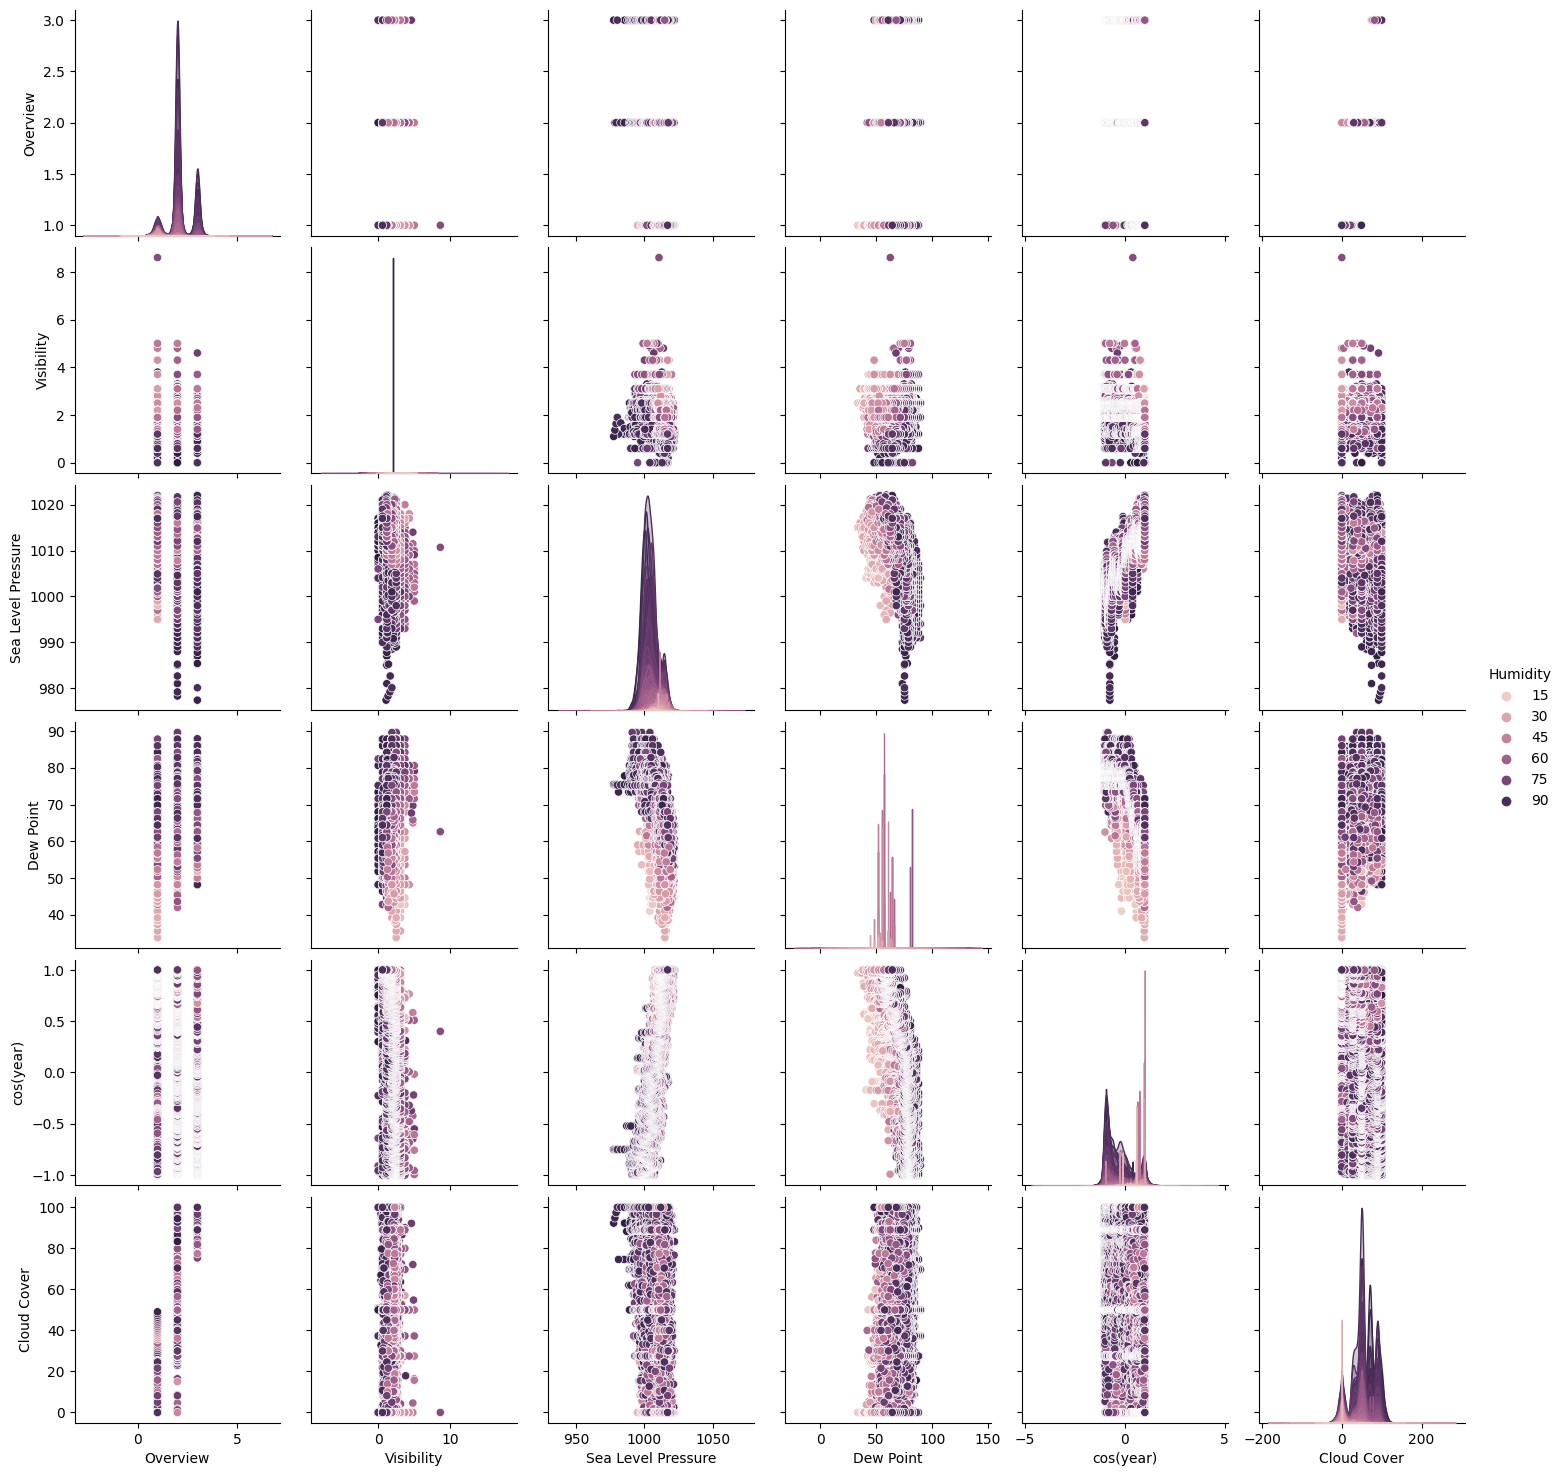

In [33]:
plot_scatter_density(df, "Humidity")

### Creating X and Y

In [34]:
def df_to_xy(df, output_cols, frame_size=6, offset=6):
    df_numpy = df.to_numpy()
    X = []
    Y = []
    for i in range(len(df)-frame_size-offset):
        row = [t_th_vals for t_th_vals in df_numpy[i:i+frame_size]]
        label = [df_numpy[i+frame_size+offset][col] for col in output_cols]
        X.append(row)
        Y.append(label)
    return np.array(X), np.array(Y)

### standardize the data

In [35]:
def mean_std(X, num_features):
    mean = [np.mean(X[:,:,i]) for i in range(num_features)]
    std = [np.std(X[:,:,i]) for i in range(num_features)]
    return np.array(mean), np.array(std)

def standardizeX(X, mean, std):
    for i in range(len(mean)):
        X[:,:,i] = (X[:, :, i]-mean[i])/std[i]
    return X

def standardizeY(Y, mean, std, col_inds):
    for i in range(len(col_inds)):
        Y[:,i] = (Y[:, i]-mean[col_inds[i]])/std[col_inds[i]]
    return Y

def revY(Y, mean, std, col_inds):
    Y = (Y*std[col_inds]) + mean[col_inds]
    return Y

#### Train, Val, Test split

In [36]:
def split_data(
    X,Y,
    train_size = 0.75,
    val_size = 0.05):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
    return (X_train, Y_train, X_test, Y_test)

# Train and test data

#### Global vars

In [37]:
num_features = df.shape[-1]
frame_size = 24
offset=12

In [38]:
def create_xy(df, output_cols, num_features, frame_size=24, offset=12):
    print(output_cols)
    col_inds = [i for i in range(num_features) if df.columns[i] in output_cols]
    X, Y = df_to_xy(df, col_inds, frame_size, offset)
    
    (X_train, Y_train, X_test, Y_test) = split_data(X, Y)
    
    mean, std = mean_std(X_train, num_features)
    X = standardizeX(X, mean, std)
    Y = standardizeY(Y, mean, std, col_inds)
#     print(X.shape, Y.shape)
    (X_train, Y_train, X_test, Y_test) = split_data(X, Y)
    
    pickle.dump({"mean":mean, "std":std}, open("mean_std.pkl", 'wb'))
    
    return X_train, Y_train, X_test, Y_test, mean, std, col_inds


# Model

### Hyperparameter tuning

In [39]:
# Define the model building function
def build_model(hp):
    model = keras.Sequential()
    
    # Tune the number of LSTM layers
    for i in range(hp.Int('num_lstm_layers', 1, 3)):
        model.add(layers.LSTM(units=hp.Int(f'lstm_{i}_units', 12, 64),
                              return_sequences=True if i < hp.get('num_lstm_layers') - 1 else False))
    
    # Tune the number of Dense layers and units
    for i in range(hp.Int('num_dense_layers', 1, 3)):
        model.add(layers.Dense(units=hp.Int(f'dense_{i}_units', 8, 64), activation='relu'))
    
    model.add(layers.Dropout(hp.Float('dropout', 0.0, 0.5, step=0.1)))
    model.add(layers.Dense(1, activation='linear'))
    
    model.compile(
        optimizer=tf.keras.optimizers.Adam(hp.Float('learning_rate', 0.001, 0.1, step=0.01)),
        loss='mean_squared_error',
        metrics=['mean_squared_error', 'accuracy'])
    
    return model

In [40]:
def get_best_tuned_model(
    workdir = "/kaggle/working/my_dir",
    project_name="temp", 
    input_shape=(None, frame_size, num_features)):
    
    tuner = kt.RandomSearch(
        hypermodel=build_model,
        objective='val_mean_squared_error',
        max_trials=10,
        executions_per_trial=2,
        overwrite=False,
        directory=workdir,
        project_name=project_name
    )
    
    best_model_count = 10
    bo_tuner_best_models = tuner.get_best_models(num_models=best_model_count)
    
    best_model_id = 0
    model = bo_tuner_best_models[best_model_id]
    model.build(input_shape=input_shape)
    
    return model

In [41]:
def get_score(model, output_cols=["Temperature"]):
    X_train, Y_train, X_test, Y_test, mean, std, col_inds = create_xy(df, output_cols, num_features, frame_size=frame_size)
    Y_test_pred = model.predict(X_test)
    Y_train_pred = model.predict(X_train)
    
    print("Accuracy ;-")
    print("Train Score :")
    for i in range(len(output_cols)):
        print(output_cols[i]+":",r2_score(Y_train[:,i], Y_train_pred[:,i]))
        
    print("Test Score :")
    for i in range(len(output_cols)):
        print(output_cols[i]+":",r2_score(Y_test[:,i], Y_test_pred[:,i]))
   
    return Y_test, Y_test_pred


In [42]:
X_train, Y_train, X_test, Y_test, mean, std, col_inds = create_xy(df, ["Temperature"], num_features, frame_size=frame_size)
# Define the tuner
tuner = RandomSearch(
    build_model,
    objective='val_mean_squared_error',
    max_trials=20,
    executions_per_trial=2,
    directory='my_dir',
    project_name='temp')

# Define the callbacks
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5),
    tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=3)
]

# Start the hyperparameter search
tuner.search(X_train, Y_train,
             epochs=20,
             validation_data=(X_test, Y_test),
             callbacks=callbacks)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best hyperparameters: {best_hps.values}")

Trial 20 Complete [00h 03m 04s]

val_mean_squared_error: 0.5801268294453621



Best val_mean_squared_error So Far: 0.046983378008008

Total elapsed time: 02h 00m 58s

Best hyperparameters: {'num_lstm_layers': 1, 'lstm_0_units': 60, 'num_dense_layers': 1, 'dense_0_units': 23, 'dropout': 0.2, 'learning_rate': 0.001}


In [43]:
temp_model = get_best_tuned_model(project_name="temp")
our_temp_test, our_temp_pred = get_score(temp_model, output_cols=["Temperature"])

['Temperature']

330/330 [==============================] - 1s 2ms/step

1317/1317 [==============================] - 3s 2ms/step

Accuracy ;-

Train Score :

Temperature: 0.9600940289983902

Test Score :

Temperature: 0.9598336838600927


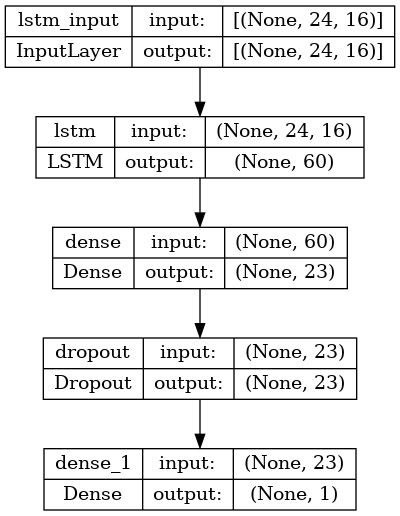

In [44]:
plot_model(temp_model, to_file='temp_model_plot.png', show_shapes=True, show_layer_names=True)

In [45]:
X_train, Y_train, X_test, Y_test, mean, std, col_inds = create_xy(df, ["Humidity"], num_features, frame_size=frame_size)

# Define the tuner
tuner = RandomSearch(
    build_model,
    objective='val_mean_squared_error',
    max_trials=20,
    executions_per_trial=2,
    directory='my_dir',
    project_name='hum')

# Define the callbacks
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5),
    tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=3)
]

# Start the hyperparameter search
tuner.search(X_train, Y_train,
             epochs=20,
             validation_data=(X_test, Y_test),
             callbacks=callbacks)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best hyperparameters: {best_hps.values}")

Trial 20 Complete [00h 06m 51s]

val_mean_squared_error: 0.18948139250278473



Best val_mean_squared_error So Far: 0.09906953200697899

Total elapsed time: 01h 53m 05s

Best hyperparameters: {'num_lstm_layers': 3, 'lstm_0_units': 58, 'num_dense_layers': 1, 'dense_0_units': 53, 'dropout': 0.0, 'learning_rate': 0.001, 'lstm_1_units': 64, 'dense_1_units': 31, 'dense_2_units': 24, 'lstm_2_units': 37}


In [46]:
hum_model = get_best_tuned_model(project_name="hum")
our_hum_test, our_hum_pred = get_score(hum_model, output_cols=["Humidity"])

['Humidity']

330/330 [==============================] - 3s 4ms/step

1317/1317 [==============================] - 5s 4ms/step

Accuracy ;-

Train Score :

Humidity: 0.9296693759030213

Test Score :

Humidity: 0.9278768468737398


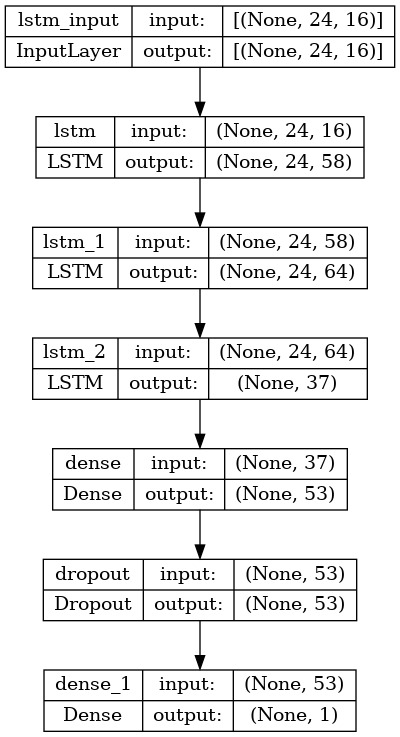

In [47]:
plot_model(hum_model, to_file='hum_model_plot.png', show_shapes=True, show_layer_names=True)

In [48]:
import pickle
pickle.dump(temp_model, open("temp_model.pkl", 'wb'))
pickle.dump(hum_model, open("hum_model.pkl", 'wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:

...layers

......dense

.........vars

............0

............1

......dense_1

.........vars

............0

............1

......dropout

.........vars

......lstm

.........cell

............vars

...............0

...............1

...............2

.........vars

...optimizer

......vars

.........0

...vars

Keras model archive saving:

File Name                                             Modified             Size

config.json                                    2023-05-15 23:48:29         2783

variables.h5                                   2023-05-15 23:48:29        97328

metadata.json                                  2023-05-15 23:48:29           64

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:

...layers

......dense

.........vars

............0

............1

......dense_1

.........vars

............0

............1

......dropout

.........vars

......lstm

.........cell

.......

# Evaluation

In [49]:
from sklearn.preprocessing import StandardScaler

# Instantiate the MinMaxScaler
scaler = StandardScaler()

# Normalize the dataframe
standardized_data = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [50]:
X_temp = standardized_data.drop(["Temperature"], axis=1)
Y_temp = standardized_data["Temperature"]
X_hum = standardized_data.drop(["Humidity"], axis=1)
Y_hum = standardized_data["Humidity"]

In [51]:
X_temp_train, X_temp_test, y_temp_train, y_temp_test = train_test_split(X_temp, Y_temp, test_size=0.2, random_state=42)
X_hum_train, X_hum_test, y_hum_train, y_hum_test = train_test_split(X_hum, Y_hum, test_size=0.2, random_state=42)

In [52]:
X_hum_train.head()

,Temperature,Dew Point,Wind Speed,Wind Direction,Precipitation,Visibility,Cloud Cover,Sea Level Pressure,Rain,Storm,Overview,sin(day),cos(day),sin(year),cos(year)
42606,0.061711,-0.477007,0.519935,1.775617,-0.088971,-0.247279,-1.289165,0.753792,-0.279939,-0.200394,-1.281024,1.001102,-1.002016,-1.136074,0.842426
17128,-1.254782,-1.356313,0.519935,1.689648,-0.088971,-0.247279,0.260699,1.251281,-0.279939,-0.200394,0.178714,1.001102,0.995797,-0.425280,1.349147
23276,-0.126359,0.578160,-0.335788,-0.287637,-0.088971,-0.247279,0.260699,-1.236162,-0.279939,-0.200394,0.178714,-1.415773,-0.003109,-1.150548,-0.821981
4306,0.249782,0.754021,0.250993,0.142208,-0.088971,-0.247279,0.871346,-1.070333,-0.279939,-0.200394,0.178714,0.366429,1.361422,0.072392,-1.412221
30305,0.416955,1.027583,-0.360237,-0.167281,-0.088971,0.506239,0.998435,-1.070333,-0.279939,-0.200394,0.178714,-0.366429,1.361422,0.425991,-1.348373


In [53]:
# Temperature SVM model
temp_svm = SVR(kernel='linear')
temp_svm.fit(X_temp_train, y_temp_train)
temp_svm_pred = temp_svm.predict(X_temp_test)

# Humidity SVM model
hum_svm = SVR(kernel='linear')
hum_svm.fit(X_hum_train, y_hum_train)
hum_svm_pred = hum_svm.predict(X_hum_test)

In [54]:
# Temperature Random Forest model
temp_rf = RandomForestRegressor(n_estimators=100, random_state=42)
temp_rf.fit(X_temp_train, y_temp_train)
temp_rf_pred = temp_rf.predict(X_temp_test)

# Humidity Random Forest model
hum_rf = RandomForestRegressor(n_estimators=100, random_state=42)
hum_rf.fit(X_hum_train, y_hum_train)
hum_rf_pred = hum_rf.predict(X_hum_test)


In [55]:
def evaluation(
    model,
    temp_pred,
    hum_pred,
    y_temp_test=y_temp_test,
    y_hum_test=y_hum_test,
):
    # Temperature model evaluation
    temp_mse = mean_squared_error(y_temp_test, temp_pred)
    temp_rmse = (temp_mse)**(0.5)
    temp_mae = mean_absolute_error(y_temp_test, temp_pred)
    acc_temp = r2_score(y_temp_test, temp_pred)
    
    
    # Humidity model evaluation
    hum_mse = mean_squared_error(y_hum_test, hum_pred)
    hum_rmse = (hum_mse)**(0.5)
    hum_mae = mean_absolute_error(y_hum_test, hum_pred)
    acc_hum = r2_score(y_hum_test, hum_pred)
    
    
    # Print the results
    print('Temperature {}: MSE = {}, RMSE = {}, MAE = {}, accuracy = {}'.format(model,temp_mse, temp_rmse, temp_mae, acc_temp))
    print('Humidity {}: MSE = {}, RMSE = {}, MAE = {}, accuracy = {}'.format(model, hum_mse, hum_rmse, hum_mae, acc_hum))
        
    print("\n\n")

In [56]:
evaluation("SVM", temp_svm_pred, hum_svm_pred)
evaluation("Random_Forest", temp_rf_pred, hum_rf_pred)
evaluation("Our Model", our_temp_pred, our_hum_pred, our_temp_test, our_hum_test)

Temperature SVM: MSE = 0.1606307211902942, RMSE = 0.4007876260443855, MAE = 0.3120519465996888, accuracy = 0.8431760561094088

Humidity SVM: MSE = 0.20730191522727642, RMSE = 0.4553042007573359, MAE = 0.28768305893909796, accuracy = 0.7916636929786591







Temperature Random_Forest: MSE = 0.15555344680010189, RMSE = 0.3944026455287818, MAE = 0.3099355119326261, accuracy = 0.8481330044950255

Humidity Random_Forest: MSE = 0.3997125233987814, RMSE = 0.63222822097624, MAE = 0.5168206816572527, accuracy = 0.5982929974198026







Temperature Our Model: MSE = 0.03975509362407227, RMSE = 0.1993867940062036, MAE = 0.14944717983057781, accuracy = 0.9598336838600927

Humidity Our Model: MSE = 0.07117796070560199, RMSE = 0.2667919802123032, MAE = 0.20323337069531783, accuracy = 0.9278768468737398






